# Visualize Cross-Prediction Results

In [62]:
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme(
    context="paper", 
    style="whitegrid", 
    font_scale=1.2,
    rc={'figure.figsize': (10, 10), 'figure.dpi': 300}
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get Results

In [ ]:
from os.path import join

from common.paths import CROSS_PRED_RESULTS
from common.wisc import WISC_LEVEL

In [75]:
# fn = 'ridge_pts_age_cross_prediction.csv'
fn = 'ridge_pts_diagnosis_cross_prediction.csv'
results_path = join(CROSS_PRED_RESULTS, fn)
df = pd.read_csv(results_path, index_col=0)
display(df)

,Model,Target,Num Permutations,Train Group,Test Group,Score,P-value,BFR,FDR
0,ridge,WISC_FSIQ,500,Healthy,Healthy,0.037646,0.371257,False,False
1,ridge,WISC_FSIQ,500,Healthy,ADHD_One,0.190637,0.003992,False,True
2,ridge,WISC_FSIQ,500,Healthy,ADHD_Two,0.355227,0.001996,False,True
3,ridge,WISC_FSIQ,500,ADHD_One,ADHD_One,0.227197,0.013972,False,True
4,ridge,WISC_FSIQ,500,ADHD_One,ADHD_Two,0.367681,0.001996,False,True
5,ridge,WISC_FSIQ,500,ADHD_One,Healthy,0.207824,0.007984,False,True
6,ridge,WISC_FSIQ,500,ADHD_Two,ADHD_Two,0.347670,0.001996,False,True
7,ridge,WISC_FSIQ,500,ADHD_Two,Healthy,0.338976,0.001996,False,True
8,ridge,WISC_FSIQ,500,ADHD_Two,ADHD_One,0.287581,0.001996,False,True
9,ridge,WISC_VSI,500,Healthy,Healthy,0.122553,0.165669,False,False


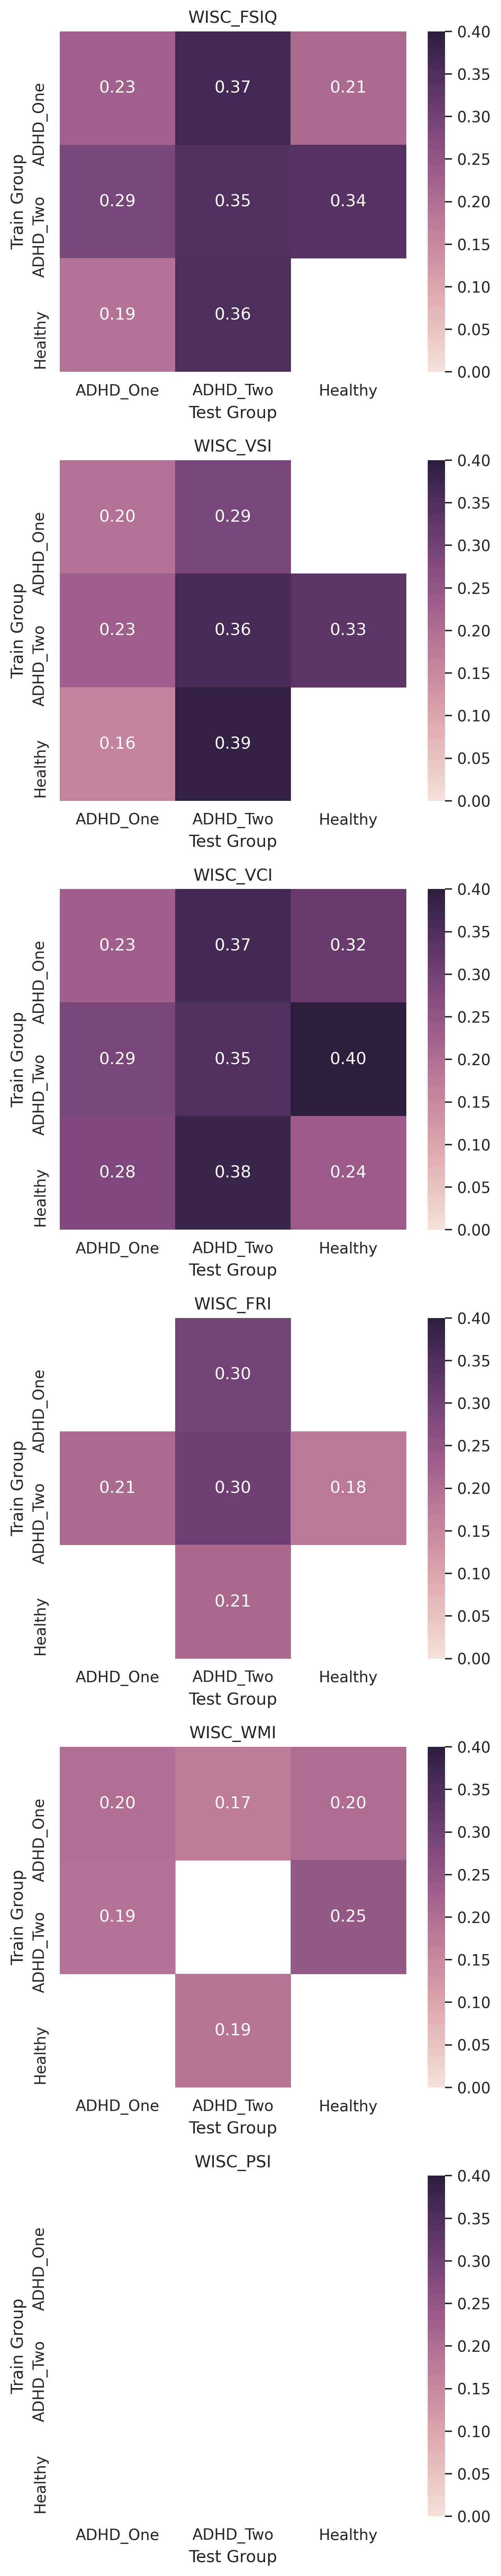

In [76]:
fig, axs = plt.subplots(nrows=6, figsize=(5, 25))
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)

for idx, measure in enumerate(WISC_LEVEL[5]):
    df_measure = df[df['Target'] == measure]
    scores = df_measure.pivot('Train Group', 'Test Group', 'Score')
    fdr = df_measure.pivot('Train Group', 'Test Group', 'FDR')
    
    ax = sns.heatmap(scores, annot=True, fmt=".2f", mask=~fdr, ax=axs[idx], cmap=cmap,
                     vmin=0, vmax=0.40)
    ax.set_title(measure)
    
fig.tight_layout()
plt.show()